In [ ]:
!pip install telegram python-telegram-bot==12.8 pandas scikit-learn seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import requests
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
telegram_bot_token = '6173965356:AAGZ_WrnnYtfU8Z3cb2VKXPhI9aGN8U-GNc'
rapid_api_token = 'e6d3059208mshb6f8204758b3d73p1d6f61jsn965db529a15e'

In [75]:
home_team_id = 85
away_team_id = 94
team_url = "https://api-football-v1.p.rapidapi.com/v3/fixtures/headtohead"
headers = {
    "X-RapidAPI-Key": rapid_api_token,
    "X-RapidAPI-Host": "api-football-v1.p.rapidapi.com"
}
querystring = {
    "h2h": "85-94"
}
response = requests.get(team_url, headers=headers, params=querystring)
data = response.json()

In [104]:
team_url = "https://api-football-v1.p.rapidapi.com/v3/teams/statistics"
headers = {
    "X-RapidAPI-Key": rapid_api_token,
    "X-RapidAPI-Host": "api-football-v1.p.rapidapi.com"
}
querystring = {
    "league": "61",
    "season": "2022",
    "team": f"{home_team_id}"
}
response = requests.get(team_url, headers=headers, params=querystring)
home_team_data = response.json()

In [76]:
df = pd.json_normalize(data["response"])

# Filter the data for the specified home and away teams
filtered_data = df[
    (
        (
            (df["teams.home.id"] == home_team_id)
            & (df["teams.away.id"] == away_team_id)
        )
        | (
            (df["teams.home.id"] == away_team_id)
            & (df["teams.away.id"] == home_team_id)
        )
    ) & (df["fixture.status.short"] != "CANC")
]

filtered_data.columns
filtered_data = filtered_data.iloc[:, [0,1,3,7,11,12,13,20,23,24,27,28,29,30,31,32,33]]
filtered_data.loc[filtered_data['teams.home.id'] == home_team_id, 'current.home.goals'] = filtered_data.loc[filtered_data['teams.home.id'] == home_team_id, 'goals.home']
filtered_data.loc[filtered_data['teams.away.id'] == home_team_id, 'current.home.goals'] = filtered_data.loc[filtered_data['teams.away.id'] == home_team_id, 'goals.away']

filtered_data.loc[filtered_data['teams.home.id'] == away_team_id, 'current.away.goals'] = filtered_data.loc[filtered_data['teams.home.id'] == away_team_id, 'goals.home']
filtered_data.loc[filtered_data['teams.away.id'] == away_team_id, 'current.away.goals'] = filtered_data.loc[filtered_data['teams.away.id'] == away_team_id, 'goals.away']

filtered_data["total.goals"] = filtered_data["current.home.goals"] + filtered_data["current.away.goals"]

filtered_data

,fixture.id,fixture.referee,fixture.date,fixture.venue.id,fixture.status.short,fixture.status.elapsed,league.id,teams.home.id,teams.home.winner,teams.away.id,teams.away.winner,goals.home,goals.away,score.halftime.home,score.halftime.away,score.fulltime.home,score.fulltime.away,current.home.goals,current.away.goals,total.goals
0,35544,"Brisard Jerome, France",2018-05-12T19:00:00+00:00,671.0,FT,90.0,61,85,False,94,True,0.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0,2.0
1,37770,K. Abed,2019-01-27T20:00:00+00:00,671.0,FT,90.0,61,85,True,94,False,4.0,1.0,1.0,1.0,4.0,1.0,4.0,1.0,5.0
2,93405,"Amaury Delerue, France",2016-11-06T19:45:00+00:00,671.0,FT,90.0,61,85,True,94,False,4.0,0.0,2.0,0.0,4.0,0.0,4.0,0.0,4.0
4,185895,"Amaury Delerue, France",2016-04-29T18:30:00+00:00,671.0,FT,90.0,61,85,True,94,False,4.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,4.0
5,186145,None,2015-01-30T19:30:00+00:00,NaN,FT,90.0,61,85,True,94,False,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
6,186664,None,2014-05-07T19:00:00+00:00,NaN,FT,90.0,61,85,False,94,True,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,3.0
7,186806,None,2012-11-17T16:00:00+00:00,NaN,FT,90.0,61,85,False,94,True,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,3.0
8,187434,None,2012-05-13T19:00:00+00:00,NaN,FT,90.0,61,85,True,94,False,3.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,3.0
9,187503,None,2010-09-19T15:00:00+00:00,NaN,FT,90.0,61,85,None,94,None,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,362348,B. Bastien,2019-08-03T11:30:00+00:00,NaN,FT,90.0,526,85,True,94,False,2.0,1.0,0.0,1.0,2.0,1.0,2.0,1.0,3.0


<ipython-input-77-eadf4fc2bbf8>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(filtered_data.corr())


<Axes: >

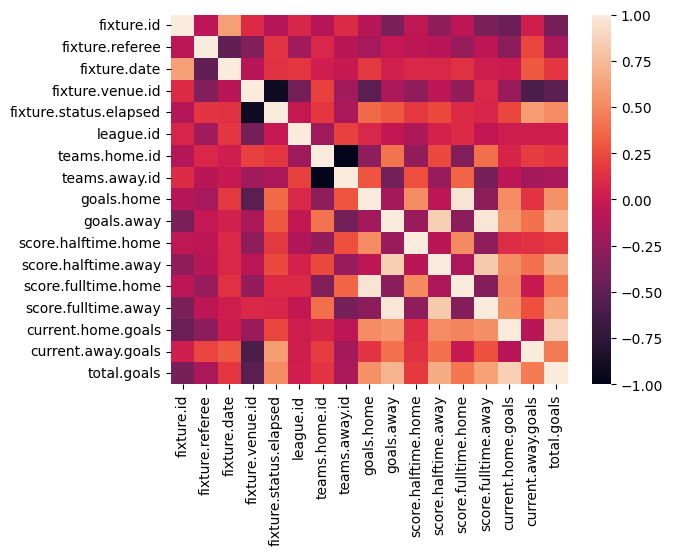

In [77]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
filtered_data["fixture.referee"] = le.fit_transform(filtered_data["fixture.referee"])
filtered_data["fixture.date"] = le.fit_transform(filtered_data["fixture.date"])
sns.heatmap(filtered_data.corr())

In [93]:
filtered_data.columns
filtered_data2 = filtered_data.iloc[:, [1,2,3,17,18,19]]
filtered_data2 = filtered_data2.fillna(0)
filtered_data2

,fixture.referee,fixture.date,fixture.venue.id,current.home.goals,current.away.goals,total.goals
0,5,18,671.0,0.0,2.0,2.0
1,10,20,671.0,4.0,1.0,5.0
2,1,12,671.0,4.0,0.0,4.0
4,1,11,671.0,4.0,0.0,4.0
5,13,9,0.0,1.0,0.0,1.0
6,13,7,0.0,1.0,2.0,3.0
7,13,4,0.0,1.0,2.0,3.0
8,13,3,0.0,3.0,0.0,3.0
9,13,0,0.0,0.0,0.0,0.0
10,3,22,0.0,2.0,1.0,3.0


<Axes: >

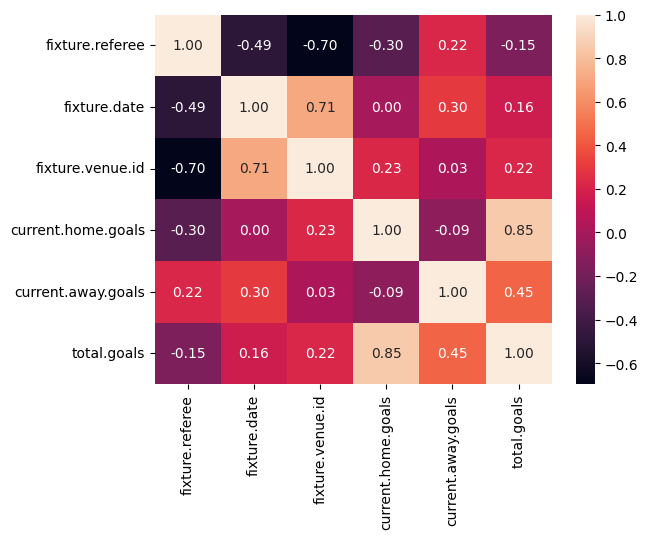

In [94]:
sns.heatmap(filtered_data2.corr(), annot=True, fmt=".2f")

In [95]:
X = filtered_data2.iloc[:, [0,1,2]]
X

,fixture.referee,fixture.date,fixture.venue.id
0,5,18,671.0
1,10,20,671.0
2,1,12,671.0
4,1,11,671.0
5,13,9,0.0
6,13,7,0.0
7,13,4,0.0
8,13,3,0.0
9,13,0,0.0
10,3,22,0.0


In [96]:
y = filtered_data2["total.goals"]

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [98]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [99]:
y_pred = model.predict(X_test)
print(y_test)
print(y_pred)

2     4.0
29    2.0
14    5.0
11    3.0
27    1.0
25    2.0
Name: total.goals, dtype: float64
[2.71597184 3.68368522 2.85273849 3.08447416 2.56699822 2.64395764]


In [100]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.10506679858483903